# Introduction

Danny seriously loves Japanese food so in the beginning of 2021, he decides to embark upon a risky venture and opens up a cute little restaurant that sells his 3 favourite foods: sushi, curry and ramen.

Danny’s Diner is in need of your assistance to help the restaurant stay afloat - the restaurant has captured some very basic data from their few months of operation but have no idea how to use their data to help them run the business.

## Problem Statement
Danny wants to use the data to answer a few simple questions about his customers, especially about their visiting patterns, how much money they’ve spent and also which menu items are their favourite. Having this deeper connection with his customers will help him deliver a better and more personalised experience for his loyal customers.

He plans on using these insights to help him decide whether he should expand the existing customer loyalty program - additionally he needs help to generate some basic datasets so his team can easily inspect the data without needing to use SQL.

Danny has provided you with a sample of his overall customer data due to privacy issues - but he hopes that these examples are enough for you to write fully functioning SQL queries to help him answer his questions!

Danny has shared with you 3 key datasets for this case study:

- sales
- menu
- members


## Case Study Questions
Each of the following case study questions can be answered using a single SQL statement:

1. What is the total amount each customer spent at the restaurant?
2. How many days has each customer visited the restaurant?
3. What was the first item from the menu purchased by each customer?
4. What is the most purchased item on the menu and how many times was it purchased by all customers?
5. Which item was the most popular for each customer?
6. Which item was purchased first by the customer after they became a member?
7. Which item was purchased just before the customer became a member?
8. What is the total items and amount spent for each member before they became a member?
9. If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?
10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?

# Preparation

## Import libraries and setup dependencies

In [51]:
import iplantuml

In [52]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [53]:
%sql sqlite:///dannys_diner.db

## Entity relationship diagram

Writing output for /Users/dzianiskuziomkin/Repositories/case_study_1/1d3a6cec-f2ee-45a1-a3da-e32ad1ed14af.uml to 1d3a6cec-f2ee-45a1-a3da-e32ad1ed14af.svg


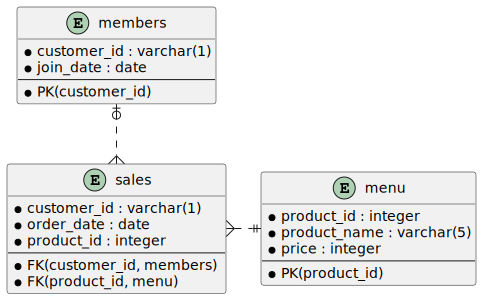

In [85]:
%%plantuml 

@startuml

entity sales {
    * customer_id : varchar(1)
    * order_date : date
    * product_id : integer
    ---
    * FK(customer_id, members)
    * FK(product_id, menu)
}

entity menu {
    * product_id : integer 
    * product_name : varchar(5)
    * price : integer 
    ---
    * PK(product_id)
}

entity members {
    * customer_id : varchar(1)
    * join_date : date
    ---
    * PK(customer_id)
}

menu ||.left.{ sales
members |o..{ sales

@enduml

## Create and populate schema

Create tables:
- Sales
- Menu
- Member

And populated tables by values

In [ ]:
%%sql

CREATE TABLE sales (
  "customer_id" VARCHAR(1),
  "order_date" DATE,
  "product_id" INTEGER
);

INSERT INTO sales
  ("customer_id", "order_date", "product_id")
VALUES
  ('A', '2021-01-01', '1'),
  ('A', '2021-01-01', '2'),
  ('A', '2021-01-07', '2'),
  ('A', '2021-01-10', '3'),
  ('A', '2021-01-11', '3'),
  ('A', '2021-01-11', '3'),
  ('B', '2021-01-01', '2'),
  ('B', '2021-01-02', '2'),
  ('B', '2021-01-04', '1'),
  ('B', '2021-01-11', '1'),
  ('B', '2021-01-16', '3'),
  ('B', '2021-02-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-01', '3'),
  ('C', '2021-01-07', '3');
 

CREATE TABLE menu (
  "product_id" INTEGER,
  "product_name" VARCHAR(5),
  "price" INTEGER
);

INSERT INTO menu
  ("product_id", "product_name", "price")
VALUES
  ('1', 'sushi', '10'),
  ('2', 'curry', '15'),
  ('3', 'ramen', '12');
  

CREATE TABLE members (
  "customer_id" VARCHAR(1),
  "join_date" DATE
);

INSERT INTO members
  ("customer_id", "join_date")
VALUES
  ('A', '2021-01-07'),
  ('B', '2021-01-09');

 * sqlite:///dannys_diner.db
(sqlite3.OperationalError) table sales already exists
[SQL: CREATE TABLE sales (
  "customer_id" VARCHAR(1),
  "order_date" DATE,
  "product_id" INTEGER
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# Solution

## 1 What is the total amount each customer spent at the restaurant?

In [74]:
%%sql

SELECT
    customer_id
    , SUM(price) AS total_amount
FROM
    sales AS s
LEFT JOIN menu AS m ON s.product_id = m.product_id
GROUP BY 
    customer_id
    

 * sqlite:///dannys_diner.db
Done.


customer_id,total_amount
A,76
B,74
C,36


## 2 How many days has each customer visited the restaurant?

In [107]:
%%sql

WITH agg_c AS
    (SELECT 
        customer_id
        , order_date
    FROM
        sales AS s
    GROUP BY 
        order_date
        , customer_id)

SELECT
    customer_id
    ,COUNT(customer_id) AS total_days
FROM
    agg_c
GROUP BY 
    customer_id



 * sqlite:///dannys_diner.db
Done.


customer_id,total_days
A,4
B,6
C,2


## 3 What was the first item from the menu purchased by each customer?

In [126]:
%%sql

WITH min_item_id AS(
    SELECT
        s.customer_id
        , MIN(s.product_id) AS firts_item_id
    FROM
        sales AS s 
    GROUP BY 
        customer_id
)

SELECT
     s.customer_id
    , m.product_name
FROM
    sales AS s
    , min_item_id
LEFT JOIN menu AS m ON s.product_id = m.product_id
WHERE
    s.customer_id = min_item_id.customer_id
    AND m.product_id = min_item_id.firts_item_id
GROUP BY 
    s.customer_id
    , m.product_name




 * sqlite:///dannys_diner.db
Done.


customer_id,product_name
A,sushi
B,sushi
C,ramen


## 4 What is the most purchased item on the menu and how many times was it purchased by all customers?

In [131]:
%%sql

SELECT
    product_name
    , COUNT(s.product_id) AS amount_of_times
FROM
    sales AS s 
LEFT JOIN menu AS m ON s.product_id = m.product_id
GROUP BY 
    product_name
ORDER BY 
    COUNT(s.product_id) DESC
LIMIT 1

 * sqlite:///dannys_diner.db
Done.


product_name,amount_of_times
ramen,8


## 5 Which item was the most popular for each customer?

In [140]:
%%sql

WITH items_count AS(
    SELECT
        s.customer_id
        , m.product_name
        , COUNT(product_name) AS amount_items
    FROM
        sales AS s 
    LEFT JOIN menu AS m ON s.product_id = m.product_id
    GROUP BY 
        s.customer_id
        , m.product_id
)

SELECT
    customer_id
    , product_name
FROM
    items_count
GROUP BY 
    customer_id
HAVING
    amount_items = MAX(amount_items)



 * sqlite:///dannys_diner.db
Done.


customer_id,product_name
A,ramen
B,sushi
C,ramen


## 6 Which item was purchased first by the customer after they became a member?

In [161]:
%%sql 

WITH member_orders AS(
    SELECT 
        s.customer_id
        , s.order_date
        , m.product_name
    FROM
        sales AS s
    LEFT JOIN members AS mb ON s.customer_id = mb.customer_id
    LEFT JOIN menu AS m ON m.product_id = s.product_id
    WHERE
        order_date >= join_date
    ORDER BY 
        s.product_id
)

SELECT
    customer_id
    , product_name
FROM
    member_orders
GROUP BY 
    customer_id
HAVING
    order_date = MIN(order_date)


 * sqlite:///dannys_diner.db
Done.


customer_id,product_name
A,curry
B,sushi


## 7 Which item was purchased just before the customer became a member?

In [160]:
%%sql 

WITH nonmember_orders AS(
    SELECT 
        s.customer_id
        , s.order_date
        , m.product_name
    FROM
        sales AS s
    LEFT JOIN members AS mb ON s.customer_id = mb.customer_id
    LEFT JOIN menu AS m ON m.product_id = s.product_id
    WHERE
        order_date < join_date
    ORDER BY 
        s.product_id DESC
)

SELECT
    customer_id
    , product_name
FROM
    nonmember_orders
GROUP BY 
    customer_id
HAVING
    order_date = MAX(order_date)


 * sqlite:///dannys_diner.db
Done.


customer_id,product_name
A,curry
B,sushi


## 8 What is the total items and amount spent for each member before they became a member?

In [162]:
%%sql 

WITH nonmember_orders AS(
    SELECT 
        s.customer_id
        , s.order_date
        , m.product_id
        , m.product_name
        , m.price
    FROM
        sales AS s
    LEFT JOIN members AS mb ON s.customer_id = mb.customer_id
    LEFT JOIN menu AS m ON m.product_id = s.product_id
    WHERE
        order_date < join_date
)

SELECT
    customer_id
    , COUNT(product_id) AS total_items
    , SUM(price) AS amount_spent
FROM
    nonmember_orders
GROUP BY
    customer_id


 * sqlite:///dannys_diner.db
Done.


customer_id,total_items,amount_spent
A,2,25
B,3,40


## 9 If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?

Requirements are not clear, I assume that customer was rewarded only if he was a member.

In [185]:
%%sql

WITH points_menu AS(
    SELECT
        product_id
        , product_name
        , price
        , CASE
            WHEN product_name != "sushi" THEN price * 10
            ELSE price * 10 * 2
            END AS points
    FROM
        menu
),

member_orders AS(
    SELECT
        s.customer_id
        , s. product_id
        , s.order_date
        , mb.join_date
    FROM
        sales AS s 
    LEFT JOIN members AS mb ON s.customer_id = mb.customer_id
    WHERE
        s.order_date >= mb.join_date
)

SELECT 
    mo.customer_id
    , SUM(pm.points) points_amount
FROM
    member_orders AS mo
LEFT JOIN points_menu AS pm ON mo.product_id = pm.product_id
GROUP BY 
    customer_id

 * sqlite:///dannys_diner.db
Done.


customer_id,points_amount
A,510
B,440


## 10 In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?

In [199]:
%%sql

WITH earned_points AS(
    SELECT
    s.customer_id
    , s.product_id
    , s.order_date
    , m.product_name
    , m.price
    , mb.join_date
    , CASE
        WHEN s.order_date >= mb.join_date AND s.order_date <= DATE(mb.join_date, "+7 day") AND strftime('%m',mb.join_date) = "01" THEN m.price * 10 * 2
        WHEN s.order_date >= mb.join_date AND m.product_name == "sushi" AND strftime('%m',mb.join_date) = "01" THEN m.price * 10 * 2
        WHEN s.order_date >= mb.join_date AND m.product_name != "sushi" AND strftime('%m',mb.join_date) = "01" THEN m.price * 10
        ELSE NULL END AS points
    FROM
        sales AS s 
    LEFT JOIN menu AS m ON s.product_id = m.product_id
    LEFT JOIN members AS mb ON s.customer_id = mb.customer_id
)

SELECT
    customer_id
    , SUM(points) AS points_amount
FROM
    earned_points
GROUP BY 
    customer_id
HAVING 
    SUM(points) IS NOT NULL



 * sqlite:///dannys_diner.db
Done.


customer_id,points_amount
A,1020
B,560
